# Predecir el uso del alquiler de bicicletas

### Importando librerias

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

### Importando el set de datos

In [44]:
bike = pd.read_csv("rentas_bicis.csv", sep=",")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


## Limpieza de datos

<Axes: >

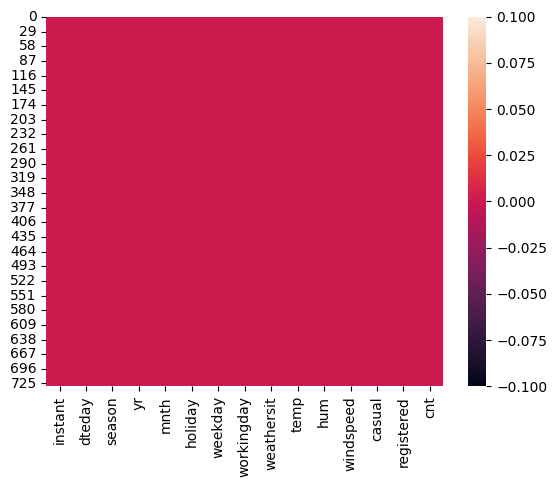

In [45]:
sns.heatmap(bike.isnull())

In [46]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


### Limpieza de columnas

In [47]:
bike = bike.drop(labels= ['instant'], axis=1)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [48]:
bike = bike.drop(labels= ['casual', 'registered'], axis=1)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


### Formato de fecha

In [49]:
bike.dteday = pd.to_datetime(bike.dteday, format= '%m/%d/%Y')
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


### DateTime como Index

In [50]:
bike.index = pd.DatetimeIndex(bike.dteday)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [51]:
bike = bike.drop( labels= ['dteday'], axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


### Visualizacion

Text(0, 0.5, 'Renta de Bicis')

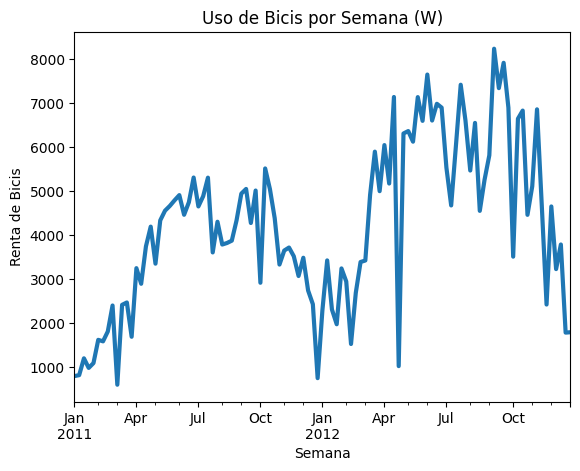

In [52]:
bike['cnt'].asfreq('W').plot(linewidth=3)
plt.title('Uso de Bicis por Semana (W)')
plt.xlabel('Semana')
plt.ylabel('Renta de Bicis')

C:\Users\Richard Rivera\AppData\Local\Temp\ipykernel_6932\1040483747.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bike['cnt'].asfreq('M').plot(linewidth=3)


Text(0, 0.5, 'Renta de Bicis')

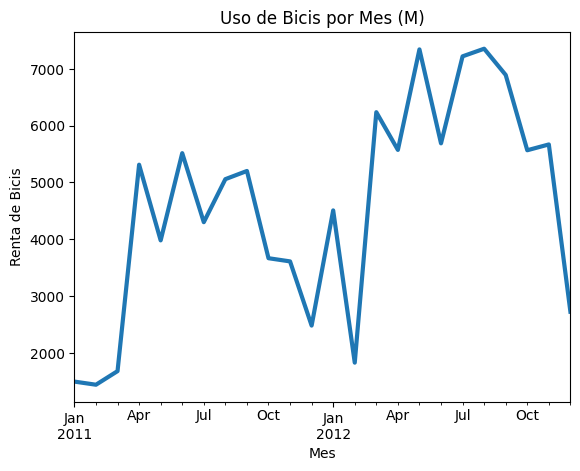

In [53]:
bike['cnt'].asfreq('M').plot(linewidth=3)
plt.title('Uso de Bicis por Mes (M)')
plt.xlabel('Mes')
plt.ylabel('Renta de Bicis')

C:\Users\Richard Rivera\AppData\Local\Temp\ipykernel_6932\67106681.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  bike['cnt'].asfreq('Q').plot(linewidth=3)


Text(0, 0.5, 'Renta de Bicis')

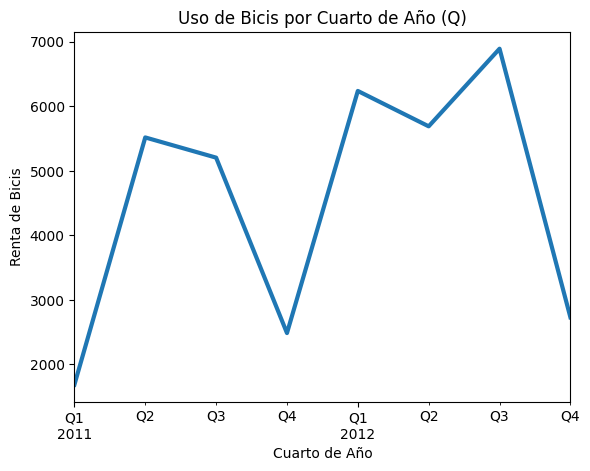

In [54]:
bike['cnt'].asfreq('Q').plot(linewidth=3)
plt.title('Uso de Bicis por Cuarto de Año (Q)')
plt.xlabel('Cuarto de Año')
plt.ylabel('Renta de Bicis')

## Datos Categoricos y Numericos

### Datos Numericos

In [55]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 84.7 KB


In [56]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


#### Encontrando correlacion en Datos Numericos

<Axes: >

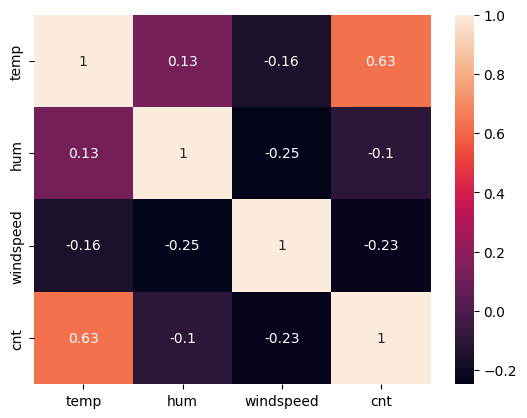

In [57]:
sns.heatmap(X_numerical.corr(), annot= True)

## Datos Categoricos

In [58]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
X_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
onehotenconder = OneHotEncoder()
X_cat = onehotenconder.fit_transform(X_cat).toarray()
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [61]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [62]:
X_numerical = X_numerical.reset_index()
X_numerical

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [63]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all = X_all.drop('dteday', axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [64]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1:].values

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y 

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

## Separar set de datos en entranamiento y prueba

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Definiendo Modelo

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

c:\Users\Richard Rivera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,901 (93.36 KB)

 Trainable params: 23,901 (93.36 KB)

 Non-trainable params: 0 (0.00 B)

### Compilando

In [71]:
model.compile(optimizer='Adam', loss='mean_squared_error')

### Entrenamiento

In [72]:
epochs_hist = model.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_split = 0.2)


Epoch 1/20


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1051 - val_loss: 0.0281
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0283 - val_loss: 0.0147
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - val_loss: 0.0140
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - val_loss: 0.0130
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - val_loss: 0.0109
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - val_loss: 0.0103
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - val_loss: 0.0101
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - val_loss: 0.0097
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - val_loss: 0.0093
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0090
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0094
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - val_loss: 0.0093

## Prediccion

In [74]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

### Grafico

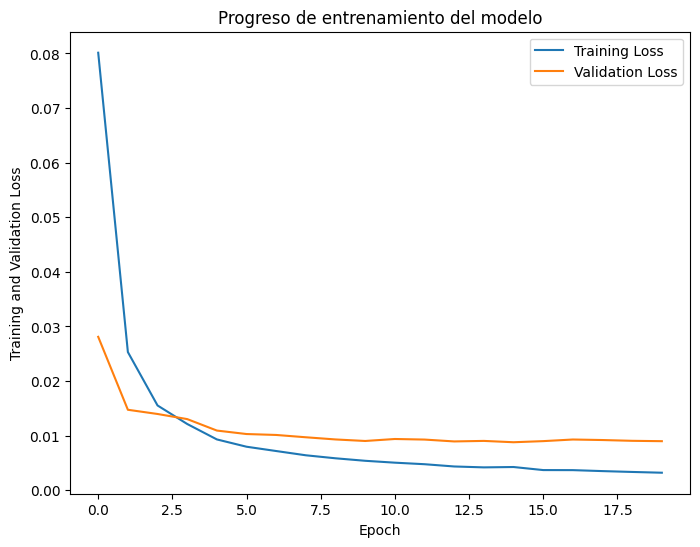

In [77]:
plt.figure(figsize=(8,6))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Progreso de entrenamiento del modelo')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(0, 0.5, 'Valores Verdaderos')

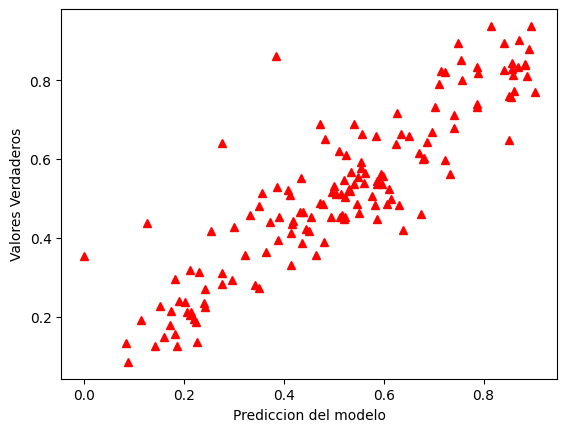

In [78]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color='r')
plt.xlabel('Prediccion del modelo')
plt.ylabel('Valores Verdaderos')